## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset and understand
- columns
- size
- shape
- info
- descrcibe

In [2]:
df = pd.read_csv("loan_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Age,Existing EMIs
0,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y,59,363.888889
1,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y,49,386.111111
2,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y,35,333.333333
3,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,28,286.111111
4,LP002141,Male,Yes,3+,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural,Y,41,263.888889


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Age', 'Existing EMIs'],
      dtype='object')

In [4]:
df.size

7080

In [5]:
df.shape

(472, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            472 non-null    object 
 1   Gender             464 non-null    object 
 2   Married            469 non-null    object 
 3   Dependents         461 non-null    object 
 4   Education          472 non-null    object 
 5   Self_Employed      446 non-null    object 
 6   ApplicantIncome    472 non-null    int64  
 7   CoapplicantIncome  472 non-null    float64
 8   LoanAmount         458 non-null    float64
 9   Loan_Amount_Term   461 non-null    float64
 10  Credit_History     429 non-null    float64
 11  Property_Area      472 non-null    object 
 12  Loan_Status        472 non-null    object 
 13  Age                472 non-null    int64  
 14  Existing EMIs      472 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 55.4+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age,Existing EMIs
count,472.000000,472.000000,458.000000,461.000000,429.000000,472.000000,472.000000
mean,5562.283898,1487.771017,145.628821,341.180043,0.946387,41.368644,449.064560
std,6580.578703,1934.875373,87.660461,62.851621,0.225516,11.782337,535.675243
min,210.000000,0.000000,17.000000,12.000000,0.000000,21.000000,0.000000
25%,2917.000000,0.000000,100.000000,360.000000,1.000000,31.000000,271.666667
50%,3858.500000,1128.500000,126.000000,360.000000,1.000000,43.000000,356.944444
75%,5823.000000,2287.750000,162.000000,360.000000,1.000000,52.000000,486.111111
max,81000.000000,20000.000000,700.000000,480.000000,1.000000,60.000000,9250.000000


# Data Cleaning & Preprocessing
## Handle missing income and credit history values
- by mean
- by mode
- by median
- by bfill
- by ffill

In [8]:
df.isnull().sum()

Loan_ID               0
Gender                8
Married               3
Dependents           11
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           14
Loan_Amount_Term     11
Credit_History       43
Property_Area         0
Loan_Status           0
Age                   0
Existing EMIs         0
dtype: int64

In [9]:
df['Married']=df['Married'].bfill()

In [10]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Gender'] = df['Gender'].bfill()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [11]:
df.info()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            472 non-null    object 
 1   Gender             472 non-null    object 
 2   Married            472 non-null    object 
 3   Dependents         472 non-null    object 
 4   Education          472 non-null    object 
 5   Self_Employed      472 non-null    object 
 6   ApplicantIncome    472 non-null    int64  
 7   CoapplicantIncome  472 non-null    float64
 8   LoanAmount         472 non-null    float64
 9   Loan_Amount_Term   472 non-null    float64
 10  Credit_History     429 non-null    float64
 11  Property_Area      472 non-null    object 
 12  Loan_Status        472 non-null    object 
 13  Age                472 non-null    int64  
 14  Existing EMIs      472 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 55.4+ KB


np.int64(43)

## Detect the Outliers
- We check it by box Plot
## Application Income

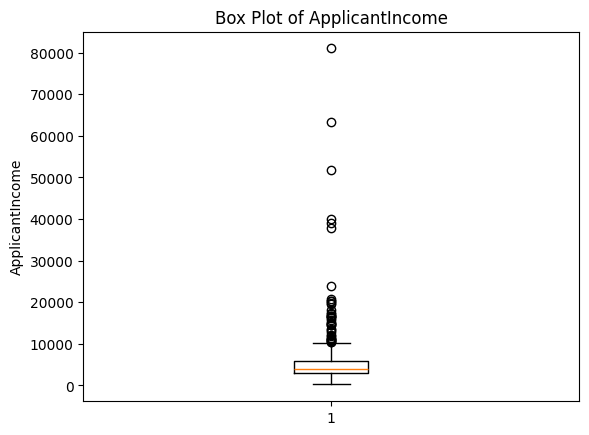

In [12]:
plt.figure()
plt.boxplot(df['ApplicantIncome'].dropna())
plt.title('Box Plot of ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.show()

## Loan Amount

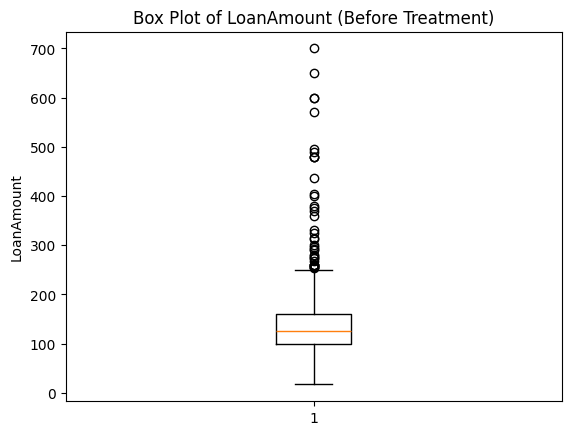

In [13]:
plt.figure()
plt.boxplot(df['LoanAmount'].dropna())
plt.title('Box Plot of LoanAmount (Before Treatment)')
plt.ylabel('LoanAmount')
plt.show()

## Detect Outliers Using IQR 
## Application Income

In [14]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_income = Q1 - 1.5 * IQR
upper_income = Q3 + 1.5 * IQR
print(lower_income, upper_income)

-1442.0 10182.0


In [15]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_loan = Q1 - 1.5 * IQR
upper_loan = Q3 + 1.5 * IQR
print(lower_income, upper_income)

-1442.0 10182.0


## Cap Outliers using IQR limits
- If value > upper it becomes upper
- If value < lower it becomes lower

In [16]:
df['ApplicantIncome'] = df['ApplicantIncome'].clip(lower=lower_income, upper=upper_income)
df['LoanAmount'] = df['LoanAmount'].clip(lower=lower_loan, upper=upper_loan)

## Box Plot – After Outlier Handling
## Applicant Income

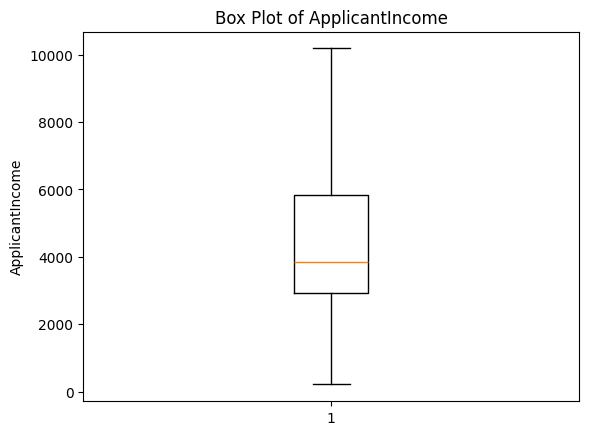

In [17]:
plt.figure()
plt.boxplot(df['ApplicantIncome'].dropna())
plt.title('Box Plot of ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.show()

## Loan Amount

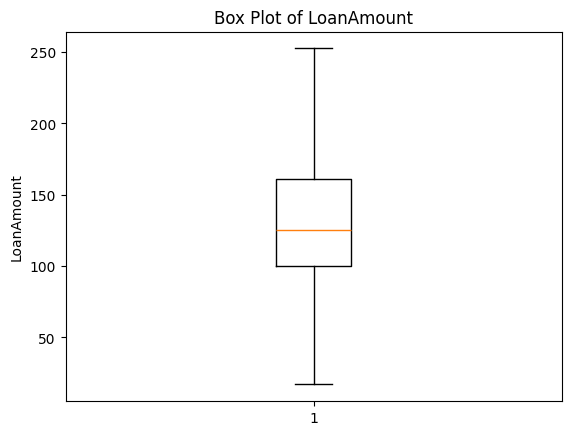

In [18]:
plt.figure()
plt.boxplot(df['LoanAmount'].dropna())
plt.title('Box Plot of LoanAmount')
plt.ylabel('LoanAmount')
plt.show()

## Encode Categorical Variables
### Step 1:Identify Categorical Columns

In [19]:
df.select_dtypes(include="object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df = df.drop("Loan_ID", axis=1)

### Step 2:Label Encoding (Binary Categorical Columns)

In [21]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})

### step 3:Encode Dependents
### Column values usually are:0, 1, 2, 3+

In [22]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(str)

### Step 4:One-Hot Encoding

In [23]:
df = pd.get_dummies(
    df,
    columns=['Property_Area'],
    prefix='Property_Area',
    drop_first=True
)

### Step 5:Encode Target Variable

In [24]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

### Step 6:Verify Encoding

In [25]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   472 non-null    int64  
 1   Married                  472 non-null    int64  
 2   Dependents               472 non-null    object 
 3   Education                472 non-null    int64  
 4   Self_Employed            472 non-null    int64  
 5   ApplicantIncome          472 non-null    int64  
 6   CoapplicantIncome        472 non-null    float64
 7   LoanAmount               472 non-null    float64
 8   Loan_Amount_Term         472 non-null    float64
 9   Credit_History           429 non-null    float64
 10  Loan_Status              472 non-null    int64  
 11  Age                      472 non-null    int64  
 12  Existing EMIs            472 non-null    float64
 13  Property_Area_Semiurban  472 non-null    bool   
 14  Property_Area_Urban      4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Age,Existing EMIs,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,1,0,2958,2900.0,131.0,360.0,1.0,1,59,363.888889,True,False
1,0,1,0,1,0,2929,2333.0,139.0,360.0,1.0,1,49,386.111111,True,False
2,0,0,0,1,0,3086,0.0,120.0,360.0,1.0,1,35,333.333333,True,False
3,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,1,28,286.111111,True,False
4,1,1,3,1,0,2666,2083.0,95.0,360.0,1.0,1,41,263.888889,False,False


## Scaling Numerical Features
### Step 1:Identify Numerical Columns

In [26]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Age', 'Existing EMIs'],
      dtype='object')

#### Seperate features and columns
- Creates new dataframe X
- Removes Loan_Status only fron X
- Original df still has Loan_Status

In [27]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

### Step 2:Import StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

### Step 3:Apply Scaling

In [29]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Step 4:Convert Back to DataFrame

In [30]:
import pandas as pd

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [31]:
X_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Age,Existing EMIs,Property_Area_Semiurban,Property_Area_Urban
0,0.458537,0.709355,-0.731558,0.495361,-0.392472,-0.694377,0.730656,-0.078110,0.295937,0.238013,1.498010,-0.159175,1.207615,-0.685861
1,-2.180848,0.709355,-0.731558,0.495361,-0.392472,-0.706067,0.437302,0.071078,0.295937,0.238013,0.648382,-0.117646,1.207615,-0.685861
2,-2.180848,-1.409731,-0.731558,0.495361,-0.392472,-0.642781,-0.769739,-0.283244,0.295937,0.238013,-0.541098,-0.216277,1.207615,-0.685861
3,0.458537,-1.409731,-0.731558,0.495361,-0.392472,-0.878995,9.577811,-0.600269,0.295937,0.238013,-1.135838,-0.304525,1.207615,-0.685861
4,0.458537,0.709355,2.245125,0.495361,-0.392472,-0.812081,0.307958,-0.749457,0.295937,0.238013,-0.031321,-0.346053,-0.828079,-0.685861


## Exploratory Data Analysis (EDA)
### How does credit history affect loan approval?

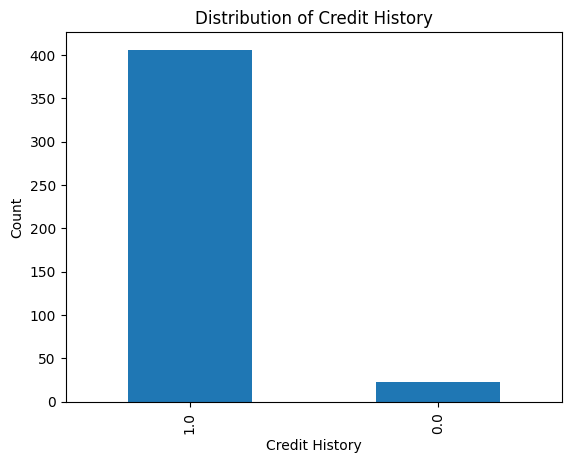

In [32]:
plt.figure()
df["Credit_History"].value_counts().plot(kind="bar")
plt.title("Distribution of Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.show()

### Credit History vs Loan Approval

<Figure size 640x480 with 0 Axes>

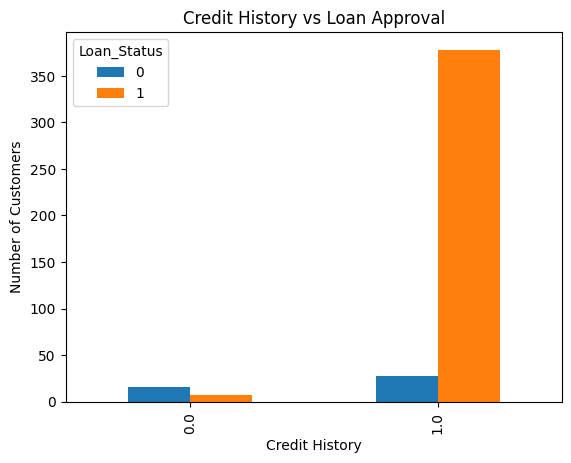

In [33]:
credit_loan = pd.crosstab(df["Credit_History"], df["Loan_Status"])

plt.figure()
credit_loan.plot(kind="bar")
plt.title("Credit History vs Loan Approval")
plt.xlabel("Credit History")
plt.ylabel("Number of Customers")
plt.show()

### Scatter Plot best for Relationship)

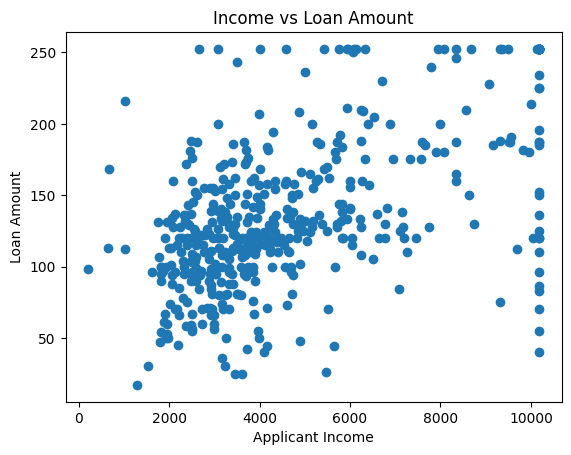

In [34]:
plt.figure()
plt.scatter(df["ApplicantIncome"], df["LoanAmount"])
plt.title("Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

### Default rate by employment type

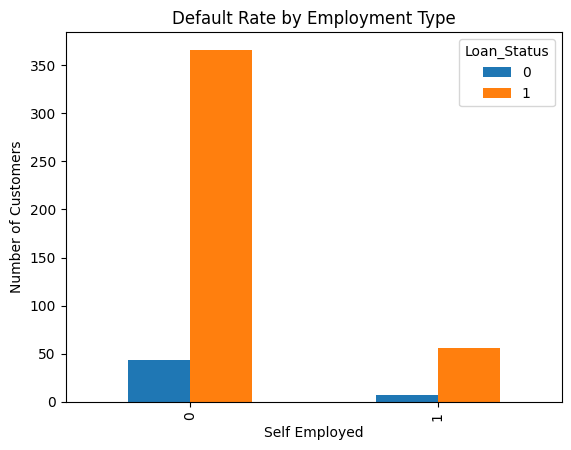

In [35]:
emp_loan = pd.crosstab(df["Self_Employed"], df["Loan_Status"])
emp_loan.plot(kind="bar")
plt.title("Default Rate by Employment Type")
plt.xlabel("Self Employed")
plt.ylabel("Number of Customers")
plt.show()

#### Risk compariision across property areras
Property Areas Usually:
- Rural
- Semiurban
- Urban

### Create Bar Chart

In [36]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Age',
       'Existing EMIs', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


In [37]:
df["Property_Area_New"] = "Rural"

df.loc[df["Property_Area_Semiurban"] == 1, "Property_Area_New"] = "Semiurban"
df.loc[df["Property_Area_Urban"] == 1, "Property_Area_New"] = "Urban"

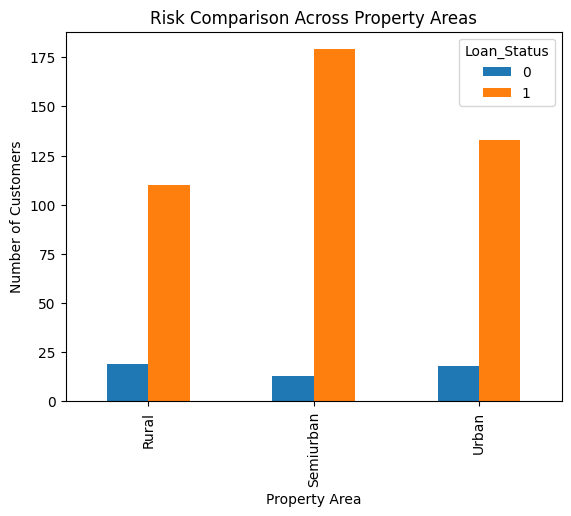

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

prop_loan = pd.crosstab(df["Property_Area_New"], df["Loan_Status"])

prop_loan.plot(kind="bar")
plt.title("Risk Comparison Across Property Areas")
plt.xlabel("Property Area")
plt.ylabel("Number of Customers")
plt.show()

## 1. Distribution Plots
### Shows how a numerical feature is spread
### Used for:
- Applicant Income
- Loan Amount
- Age

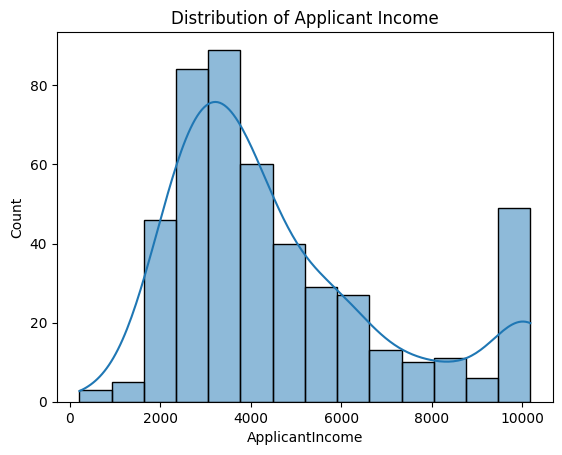

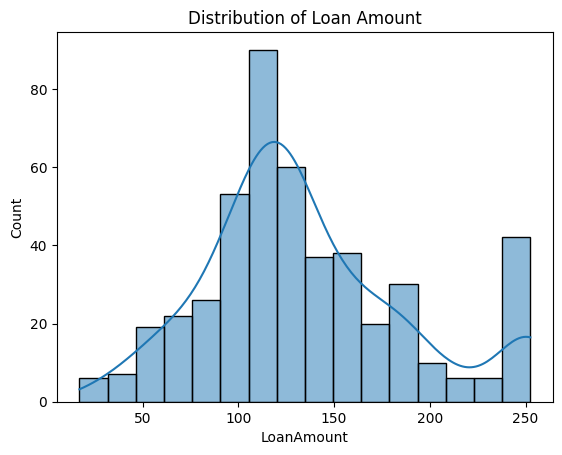

In [39]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Distribution of Applicant Income")
plt.show()

sns.histplot(df["LoanAmount"], kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

## 2. Box Plot
#### Shows:
- Median
- Spread
- Outliers
- Comparison across categories

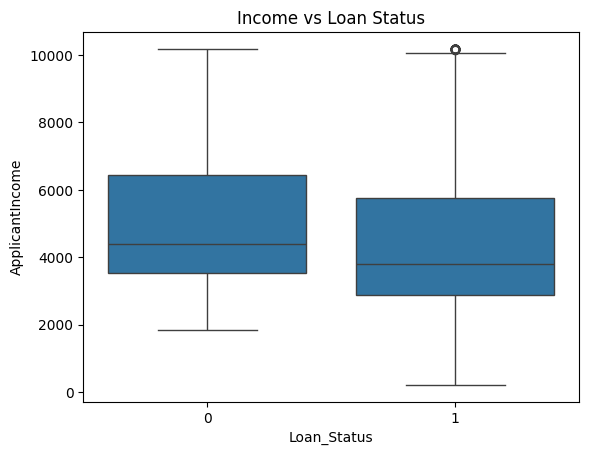

In [40]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.title("Income vs Loan Status")
plt.show()

### 3. Bar Charts
#### Compare categorical variables
Used for:
- Credit History vs Loan Status
- Employment Type vs Default
- Property Area vs Risk

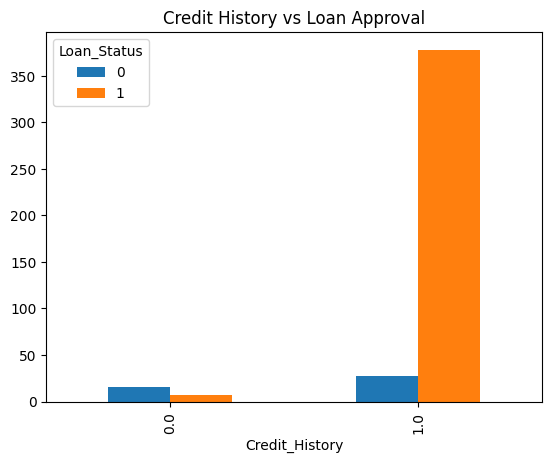

In [41]:
credit_loan = pd.crosstab(df["Credit_History"], df["Loan_Status"])
credit_loan.plot(kind="bar")
plt.title("Credit History vs Loan Approval")
plt.show()

## 4. Correlation Heatmap
#### Shows relatioonship between numerical features

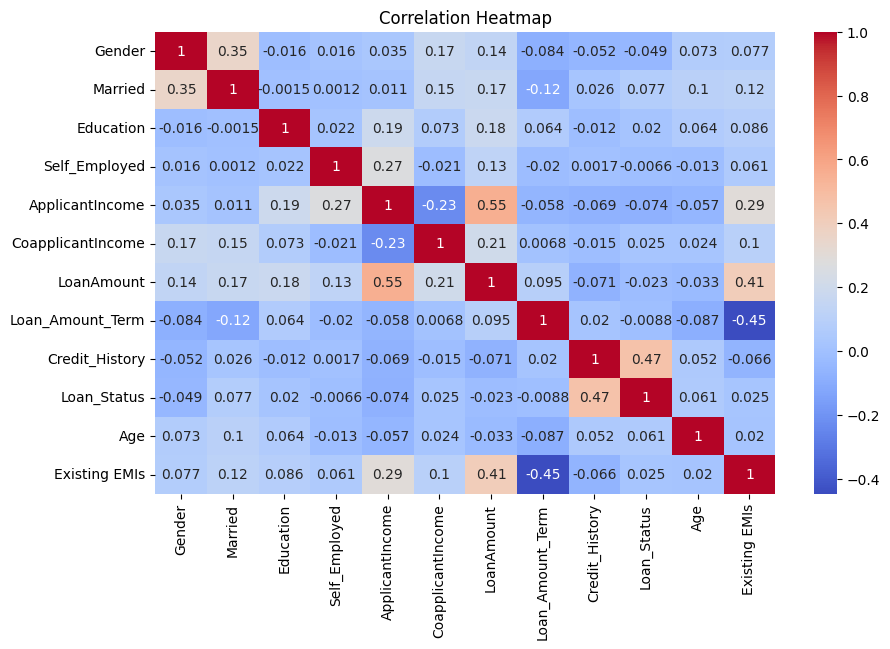

In [42]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering
### Debt-to-Income Ratio
**Formula**:Total Debt/Total Income
#### Step 1:Create Total Income

In [43]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

#### Step 2:Create Dept-to-Income Ratio
- If income = 0 it is error or infinite values

In [44]:
df["DTI"] = df["LoanAmount"] / (df["Total_Income"] + 1)

#### Step 3:Check New Feature

In [45]:
df[["Total_Income","LoanAmount","DTI"]].head()

,Total_Income,LoanAmount,DTI
0,5858.0,131.0,0.022359
1,5262.0,139.0,0.026411
2,3086.0,120.0,0.038873
3,22500.0,103.0,0.004578
4,4749.0,95.0,0.020000


## EMI-to-Income Ratio
**Formula**:EMI-to-Income=Existing EMIs/Total Income
### Step 1:Make Sure Total Income Exists

In [46]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Age',
       'Existing EMIs', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Property_Area_New', 'Total_Income', 'DTI'],
      dtype='object')

#### Step 2:Create EMI - to - Income Ratio

In [47]:
df["EMI_Income_Ratio"] = df["Existing EMIs"] / (df["Total_Income"] + 1)

#### Step 3:Check Feature

In [48]:
df[["Existing EMIs","Total_Income","EMI_Income_Ratio"]].head()

,Existing EMIs,Total_Income,EMI_Income_Ratio
0,363.888889,5858.0,0.062108
1,386.111111,5262.0,0.073363
2,333.333333,3086.0,0.107980
3,286.111111,22500.0,0.012715
4,263.888889,4749.0,0.055556


## Income Buckets 
- This conerts continuous income into categorical
- Models sometimes learn patterns better from groups
- Business people understand segments easilly
- Helps risk profiling
#### Step 1:Check Income Range

In [49]:
df["Total_Income"].describe()

count      472.000000
mean      6168.381186
std       2780.673519
min       1880.000000
25%       4191.750000
50%       5489.500000
75%       7544.000000
max      22500.000000
Name: Total_Income, dtype: float64

#### Step 2:Create Income Buckets

In [50]:
df["Income_Bucket"] = pd.qcut(
    df["Total_Income"],
    q=4,
    labels=["Low","Medium","High","Very_High"]
)

#### Step 3:Check Bucket Conuts

In [51]:
df["Income_Bucket"].value_counts()

Income_Bucket
Low          118
Medium       118
High         118
Very_High    118
Name: count, dtype: int64

In [52]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Age',
       'Existing EMIs', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Property_Area_New', 'Total_Income', 'DTI', 'EMI_Income_Ratio',
       'Income_Bucket'],
      dtype='object')

### Loan Burden Indicators
- Loan-to-Income Ratio

In [53]:
df["Loan_to_Income"] = df["LoanAmount"] / (df["Total_Income"] + 1)

- Loan vs Existing EMI Load


In [54]:
df["Loan_EMI_Burden"] = df["LoanAmount"] / (df["Existing EMIs"] + 1)

- Monthly Loan Pressure

In [55]:
df["Loan_Per_Term"] = df["LoanAmount"] / (df["Loan_Amount_Term"] + 1)

## Model Building & Comparision 
#### Step 1:Prepare Data(X and Y)

In [56]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

#### Step 2:Convert Remaining Categorical Columns

In [57]:
X = pd.get_dummies(X, drop_first=True)

#### Step 3:Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### MODEL 1:Logistic Regression

In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# -----------------------------------
# 7. Train-Test Split
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]

print("LOGISTIC REGRESSION RESULTS\n")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

LOGISTIC REGRESSION RESULTS

Accuracy : 0.9157894736842105
Precision: 0.9230769230769231
Recall   : 0.9882352941176471
ROC-AUC  : 0.491764705882353

Confusion Matrix:
 [[ 3  7]
 [ 1 84]]


### MODEL 2:Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
dt_pred = dt.predict(X_test)

# Evaluation
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("ROC-AUC:", roc_auc_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Decision Tree Results
Accuracy: 0.8421052631578947
Precision: 0.926829268292683
Recall: 0.8941176470588236
ROC-AUC: 0.6470588235294118
Confusion Matrix:
 [[ 4  6]
 [ 9 76]]


### MODEL 3:Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Results
Accuracy: 0.9052631578947369
Precision: 0.9042553191489362
Recall: 1.0
ROC-AUC: 0.55
Confusion Matrix:
 [[ 1  9]
 [ 0 85]]


## Prefered model is:
Even if accuracy is similar, Random Forest is preferred because it provides better stability, handles complex financial relationships better, and reduces overfitting compared to single models. It is also better at detecting risky customers because it usually gives better recall and ROC-AUC scores, which are more important for banks than accuracy alone. Logistic Regression assumes linear relationships and may miss complex patterns in financial data. Decision Tree can easily overfit and give unstable predictions on new data. Random Forest combines multiple trees, making predictions more reliable and robust for real-world banking loan approval systems.

#### Model Explainability
##### 1.Feature Importance:
Which features most influence loan approval prediction.

In [73]:

feature_importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

print(feature_importance)


ApplicantIncome            0.157524
Age                        0.144842
Credit_History             0.139038
Existing EMIs              0.138214
LoanAmount                 0.137287
CoapplicantIncome          0.093326
Married                    0.032195
Property_Area_Semiurban    0.026178
Property_Area_Urban        0.023903
Loan_Amount_Term           0.023667
Gender                     0.017676
Self_Employed              0.017544
Education                  0.017205
Dependents_2               0.013175
Dependents_1               0.011950
Dependents_3               0.006276
dtype: float64


##### 2. Coefficient interpretation 
Understand how each feature affects prediction

-->Positive coefficient → Increases approval chance

-->Negative coefficient → Increases rejection / default risk

In [74]:
coef_df = pd.DataFrame({"Feature": X.columns,"Coefficient": lr.coef_[0]})
print(coef_df.sort_values(by="Coefficient", ascending=False))


                    Feature  Coefficient
8            Credit_History     0.696950
10            Existing EMIs     0.568402
1                   Married     0.461106
9                       Age     0.248532
13             Dependents_3     0.217457
14  Property_Area_Semiurban     0.196514
12             Dependents_2     0.118678
11             Dependents_1     0.098088
3             Self_Employed     0.069696
7          Loan_Amount_Term     0.056234
5         CoapplicantIncome     0.032362
2                 Education    -0.041662
15      Property_Area_Urban    -0.074464
4           ApplicantIncome    -0.146612
0                    Gender    -0.307439
6                LoanAmount    -0.345969


Credit_history have positive coefficient so it helps in loan approvel



 
● What factors increase default risk? 

Poor credit history

High Debt-to-Income (DTI) ratio

High EMI-to-Income ratio

Low income

High loan compared to income

● What makes a customer low-risk? 

Good credit history

High income

Low EMI burden

Low DTI ratio

Loan amount affordable compared to income

### Data set for Dashboard

In [75]:
df.to_csv("loan_dashboard_data.csv", index=False)


### Deployment

In [76]:
import joblib
joblib.dump(rf, "loan_model.pkl")


['loan_model.pkl']

In [77]:
joblib.dump(X.columns, "model_columns.pkl")


['model_columns.pkl']

In [78]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# -------------------------------
# Load ML Model and Columns
# -------------------------------
rf = joblib.load("loan_model.pkl")
model_columns = joblib.load("model_columns.pkl")

# -------------------------------
# App Title
# -------------------------------
st.title("🏦 Bank-Style Loan Approval Prediction System")

# -------------------------------
# Customer Details
# -------------------------------
st.subheader("Customer Details")
gender = st.selectbox("Gender", ["Male", "Female"])
married = st.selectbox("Married", ["Yes", "No"])
dependents = st.selectbox("Dependents", [0, 1, 2, 3])
education = st.selectbox("Education", ["Graduate", "Not Graduate"])
self_employed = st.selectbox("Self Employed", ["Yes", "No"])

# -------------------------------
# Financial Details
# -------------------------------
st.subheader("Financial Details")
app_income = st.number_input("Applicant Monthly Income", min_value=0)
coapp_income = st.number_input("Coapplicant Monthly Income", min_value=0)
loan_amount = st.number_input("Loan Amount", min_value=0)
loan_term = st.selectbox("Loan Term (Months)", [60, 120, 180, 240, 360])
existing_emis = st.number_input("Existing EMI Payments", min_value=0)

# -------------------------------
# Credit Score Input
# -------------------------------
st.subheader("Credit Behaviour")
credit_score = st.number_input("Enter your Credit Score (300-900)", min_value=300, max_value=900)

# -------------------------------
# Property Area
# -------------------------------
st.subheader("Property Area")
property_area = st.selectbox("Property Area", ["Urban", "Semiurban", "Rural"])

# -------------------------------
# Prediction Logic
# -------------------------------
if st.button("Predict Loan Approval"):

    # -------------------------------
    # Map Credit Score to Good/Bad
    # -------------------------------
    if credit_score >= 700:
        credit_history_enc = 1  # Good
    else:
        credit_history_enc = 0  # Bad

    # -------------------------------
    # Feature Calculations
    # -------------------------------
    total_income = app_income + coapp_income
    monthly_loan_payment = loan_amount / loan_term if loan_term > 0 else 0
    emi_income_ratio = (existing_emis + monthly_loan_payment) / total_income if total_income > 0 else 0
    loan_to_income_ratio = loan_amount / total_income if total_income > 0 else 0

    # -------------------------------
    # Bank-Style Rule Checks
    # -------------------------------
    reasons = []
    approve_flag = True

    # Rule 1: Unrealistic loan
    if loan_amount > total_income * 50:
        reasons.append("Requested loan is unrealistically high compared to your income")
        approve_flag = False

    # Rule 2: EMI too high
    if emi_income_ratio > 0.5:
        reasons.append("Total EMIs exceed 50% of your income")
        approve_flag = False

    # Rule 3: Bad credit
    if credit_history_enc == 0:
        if loan_to_income_ratio > 15:
            reasons.append("Loan amount too high for your income with bad credit")
            approve_flag = False
        elif emi_income_ratio > 0.3:
            reasons.append("Monthly payment burden too high with bad credit")
            approve_flag = False

    # -------------------------------
    # ML Prediction if basic rules pass
    # -------------------------------
    if approve_flag:
        # Encode categorical features
        gender_enc = 1 if gender == "Male" else 0
        married_enc = 1 if married == "Yes" else 0
        education_enc = 1 if education == "Graduate" else 0
        self_employed_enc = 1 if self_employed == "Yes" else 0
        prop_semi = 1 if property_area == "Semiurban" else 0
        prop_urban = 1 if property_area == "Urban" else 0
        prop_new = 0

        # Prepare input for ML model
        input_data = pd.DataFrame([[
            gender_enc, married_enc, dependents, education_enc, self_employed_enc,
            app_income, coapp_income, loan_amount, loan_term,
            credit_history_enc, 30, existing_emis,
            prop_semi, prop_urban, prop_new,
            total_income, loan_to_income_ratio, emi_income_ratio
        ]], columns=[
            'Gender','Married','Dependents','Education','Self_Employed',
            'ApplicantIncome','CoapplicantIncome','LoanAmount',
            'Loan_Amount_Term','Credit_History','Age','Existing EMIs',
            'Property_Area_Semiurban','Property_Area_Urban','Property_Area_New',
            'Total_Income','DTI','EMI_Income_Ratio'
        ])

        input_data = input_data.reindex(columns=model_columns, fill_value=0)

        prediction = rf.predict(input_data)[0]

        if prediction == 1:
            st.success("✅ Loan Approved")
            st.info("Approved based on your financial profile and credit score")
        else:
            st.error("❌ Loan Rejected")
            st.warning("Rejected based on model prediction")
    else:
        st.error("❌ Loan Rejected")
        for r in reasons:
            st.warning(f"⚠ {r}")



Writing app.py


In [79]:
%%writefile requirements.txt
streamlit
scikit-learn
pandas
numpy
joblib


Writing requirements.txt


### Business Insights & Recommendations 

#### Top 5 risk indicators

Poor credit history

High Debt-to-Income (DTI) ratio

High EMI-to-Income ratio

Low income / Low income bucket

High Loan-to-Income ratio
 
#### ● Which customers to approve / reject 

##### Approve Customers

Good credit history

High or stable income

Low EMI burden

Low DTI ratio

Affordable loan amount

##### Reject / High Risk Customers

Poor credit history

Very high loan compared to income

High existing EMI burden

Low income customers

High financial stress indicators
 
#### ● How banks can reduce default risk 

Check credit history strictly

Limit loan amount based on income

Set EMI limit based on salary

Use ML models for risk prediction

Monitor high-risk customers regularly
 
#### ● Policy suggestions (minimum credit score, income threshold)

Set minimum credit score requirement

Minimum income required for loan approval

EMI should not exceed fixed % of income

Loan amount capped based on income level
